In [34]:
!pip install xgboost shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from xgboost import plot_importance
from xgboost import plot_tree
from sklearn.tree import plot_tree
from sklearn.model_selection import learning_curve
from sklearn.inspection import PartialDependenceDisplay
from sklearn.tree import plot_tree

In [35]:
# Menghubungkan ke Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
# Mengatur path dataset di Google Drive
data_path = '/content/drive/MyDrive/melb_data.csv'

# Memuat dataset
df = pd.read_csv(data_path)

# Pratinjau data
print("Pratinjau Data:")
print(df.head())

# Informasi dasar tentang dataset
print("\nInformasi Data:")
print(df.info())

# Memeriksa nilai yang hilang
print("\nJumlah Nilai Hilang per Kolom:")
print(df.isnull().sum())

Pratinjau Data:
       Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regi

In [37]:
# Memeriksa apakah kolom 'Address' ada, kemudian menghapusnya
if 'Address' in df.columns:
    df.drop(columns=['Address'], inplace=True)

# Mengisi nilai yang hilang pada kolom numerik dengan rata-rata (mean)
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Mengisi nilai yang hilang pada kolom teks/kategori dengan 'Unknown'
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

# Memeriksa apakah kolom 'Price' ada, kemudian memisahkan fitur dan target
if 'Price' in df.columns:
    X = df.drop(columns=['Price'])
    y = df['Price']
else:
    raise ValueError("Kolom 'Price' tidak ditemukan di dataset. Pastikan kolom target benar.")


In [38]:
# One-hot encoding untuk kolom kategori
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan melatih model
model = XGBRegressor()
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<Figure size 1000x800 with 0 Axes>

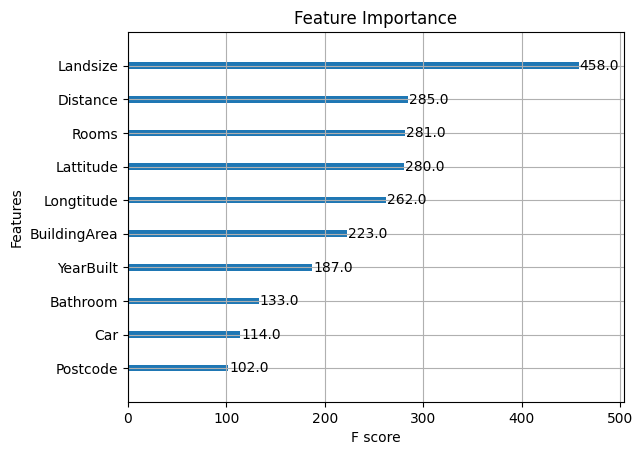

In [39]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plt.figure(figsize=(10, 8))
plot_importance(model, max_num_features=10)
plt.title('Feature Importance')
plt.show()


<Figure size 2000x1000 with 0 Axes>

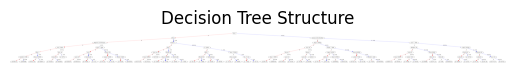

In [41]:
from xgboost import plot_tree
import matplotlib.pyplot as plt

# Menampilkan struktur pohon pertama dari model XGBoost
plt.figure(figsize=(20, 10))
plot_tree(model)  # Tanpa argumen tambahan
plt.title('Decision Tree Structure')
plt.show()

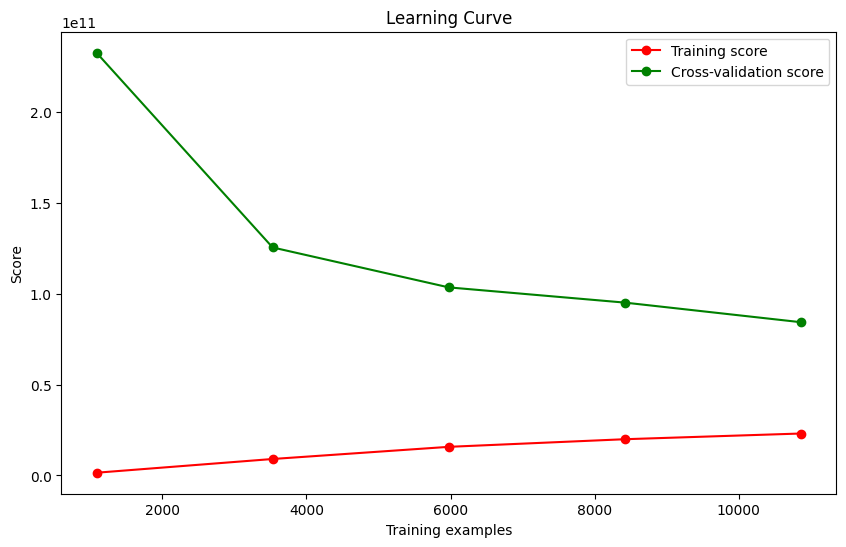

In [42]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curve")
plt.show()

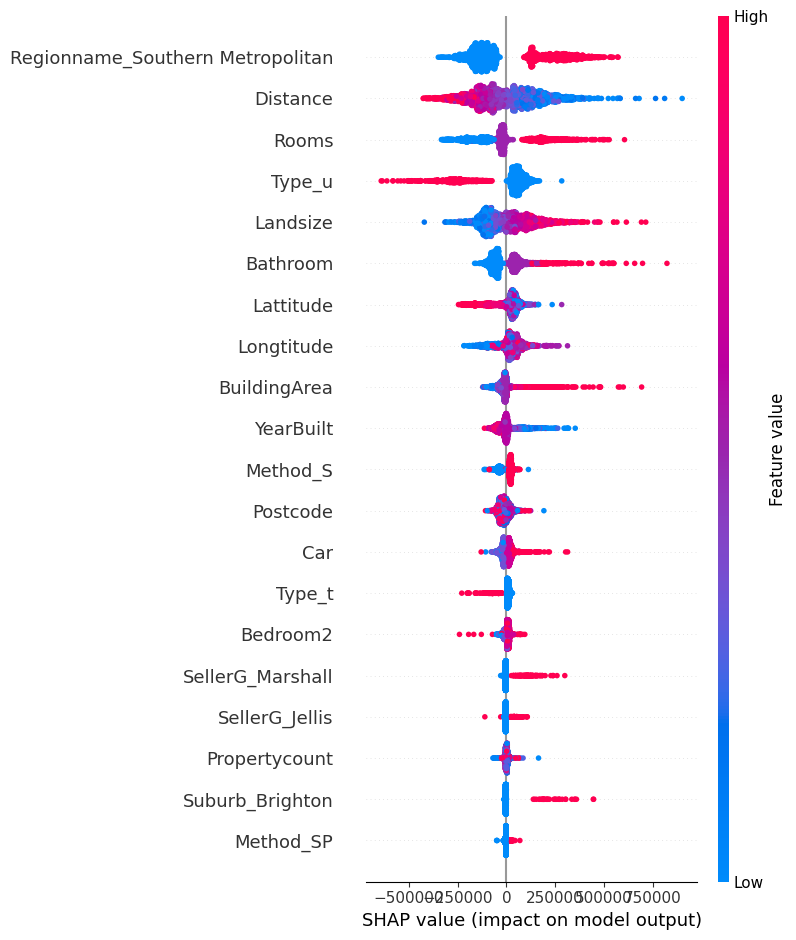

In [43]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test)


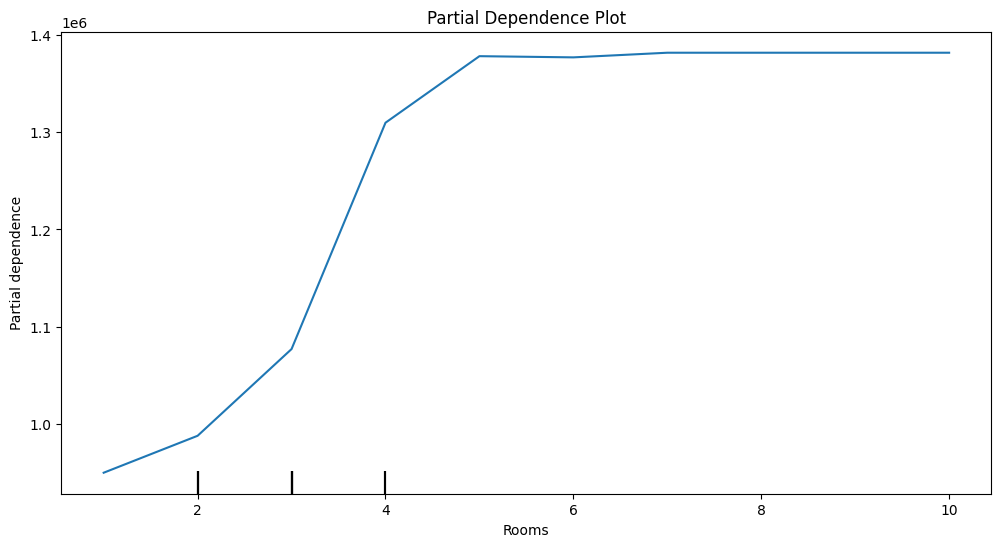

In [47]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Membuat Partial Dependence Plot
fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(model, X, [0], grid_resolution=50, ax=ax)  # Ganti [0] dengan indeks fitur yang diinginkan
plt.title("Partial Dependence Plot")
plt.show()

<Figure size 1000x800 with 0 Axes>

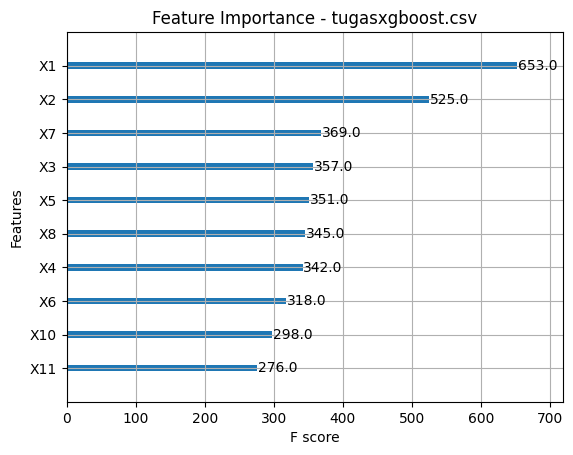

<Figure size 2000x1000 with 0 Axes>

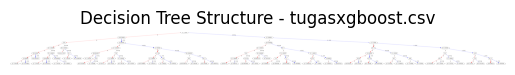

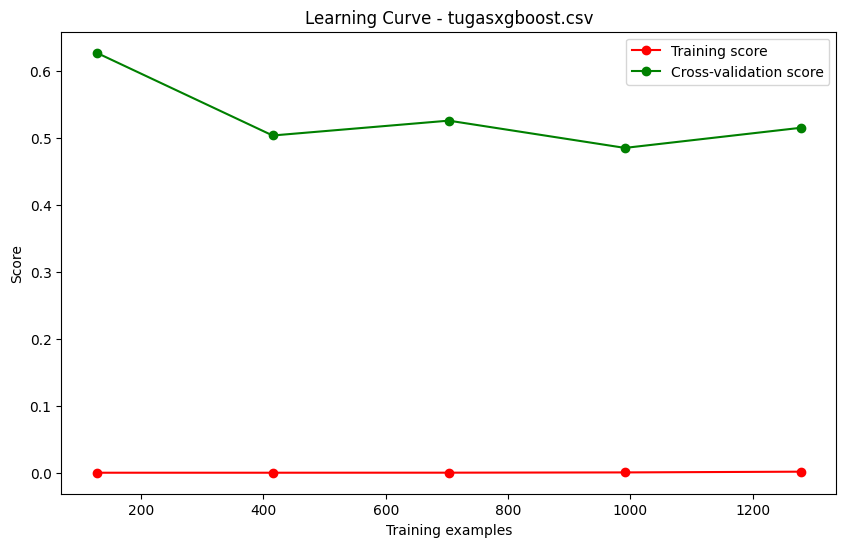

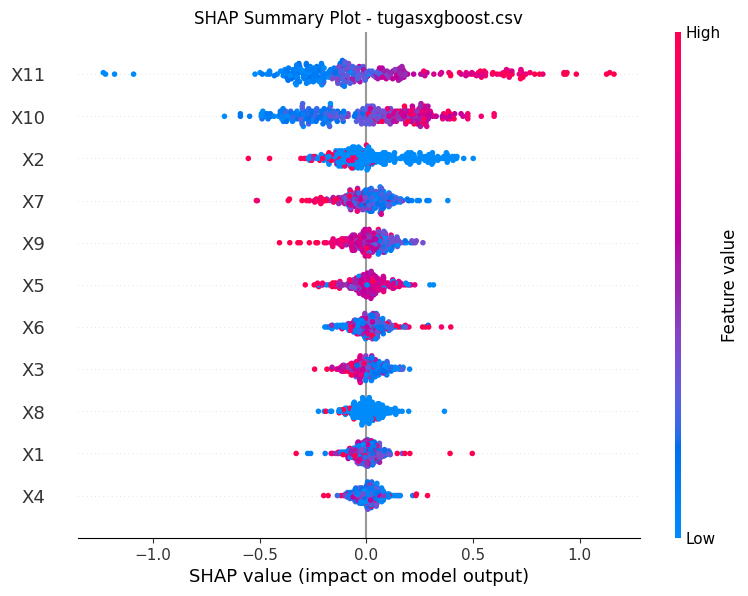

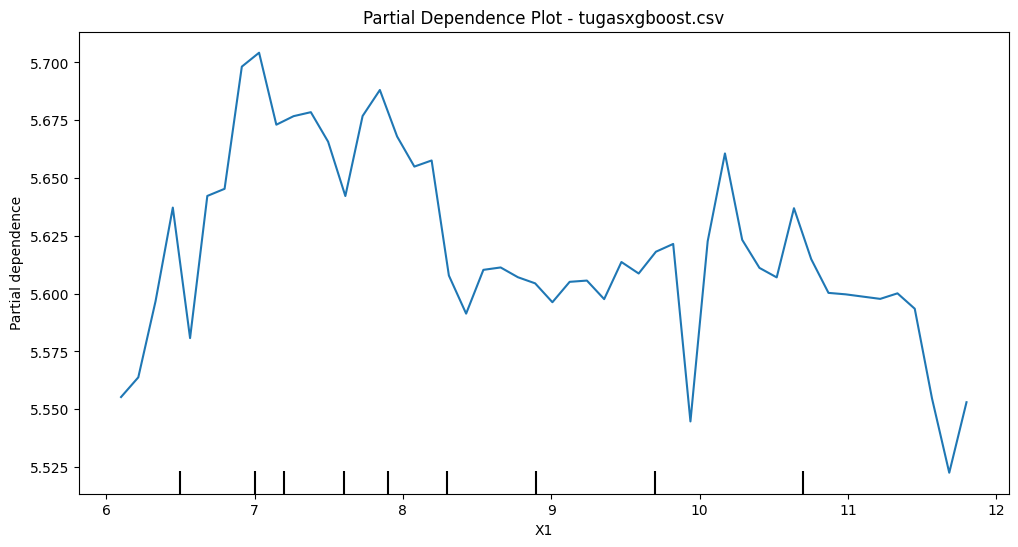

<Figure size 1000x800 with 0 Axes>

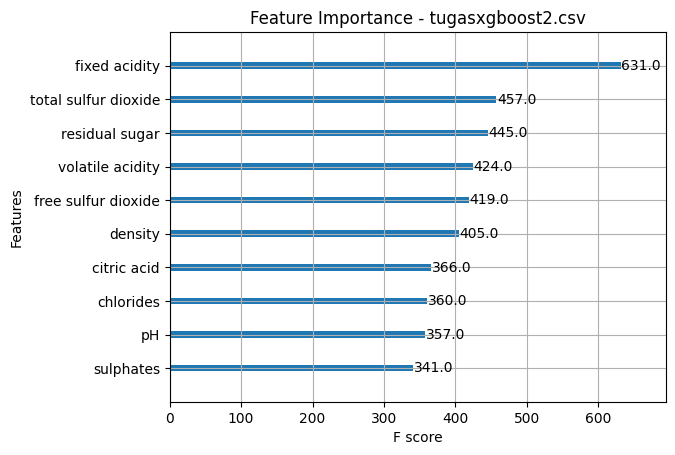

<Figure size 2000x1000 with 0 Axes>

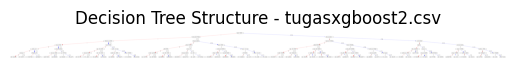

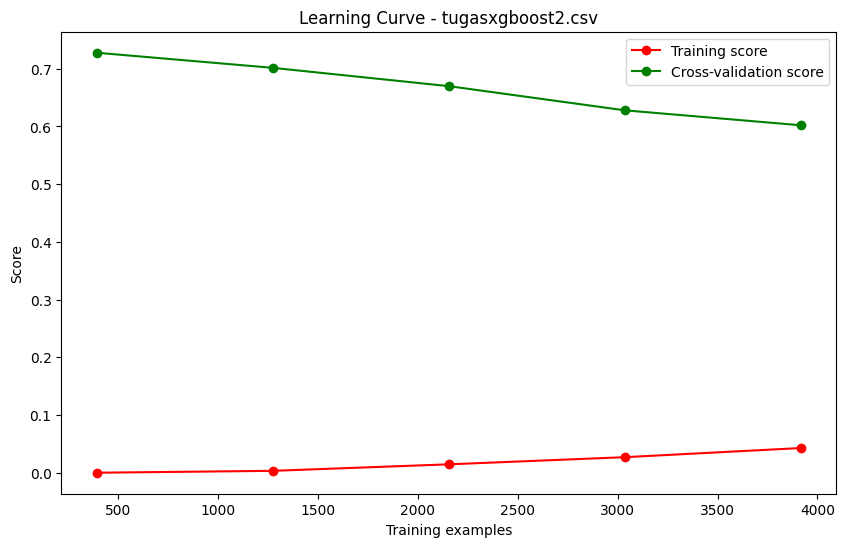

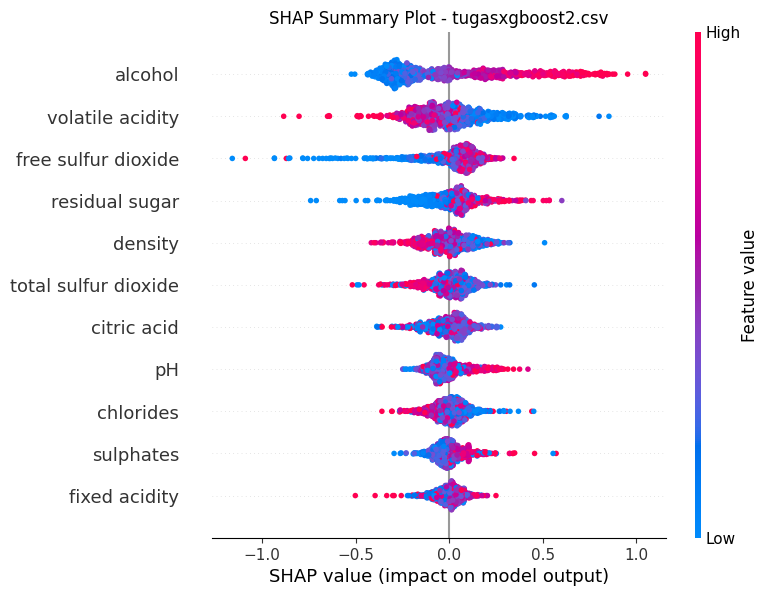

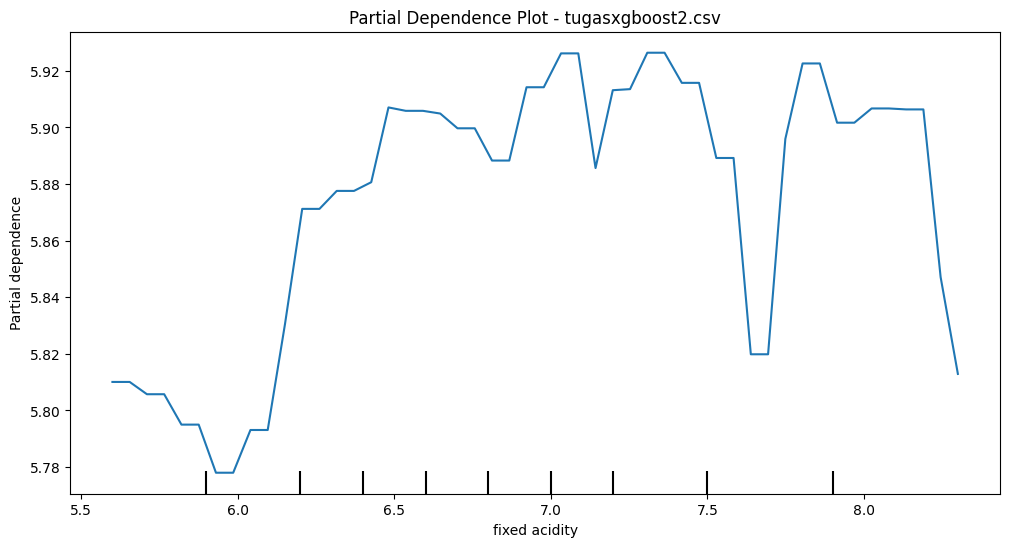

In [54]:
# Load libraries
!pip install xgboost shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor, plot_importance, plot_tree
from sklearn.model_selection import learning_curve
from sklearn.inspection import PartialDependenceDisplay

# Load and process tugasxgboost.csv
data_path1 = '/content/drive/MyDrive/tugasxgboost.csv'
df1 = pd.read_csv(data_path1)

# Check if 'Class' exists as target
if 'Class' in df1.columns:
    X1 = df1.drop(columns=['Class'])
    y1 = df1['Class']
else:
    raise ValueError("Target column 'Class' not found in tugasxgboost.csv dataset.")

# Load and process tugasxgboost2.csv
data_path2 = '/content/drive/MyDrive/tugasxgboost2.csv'
df2 = pd.read_csv(data_path2, delimiter=';')

# Check if 'quality' exists as target
if 'quality' in df2.columns:
    X2 = df2.drop(columns=['quality'])
    y2 = df2['quality']
else:
    raise ValueError("Target column 'quality' not found in tugasxgboost2.csv dataset.")

# Function to train model and plot results
def train_and_plot(X, y, dataset_name):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = XGBRegressor()
    model.fit(X_train, y_train)

    # Feature Importance Plot
    plt.figure(figsize=(10, 8))
    plot_importance(model, max_num_features=10)
    plt.title(f'Feature Importance - {dataset_name}')
    plt.show()

    # Decision Tree Structure
    plt.figure(figsize=(20, 10))
    plot_tree(model, num_trees=0)  # Show first tree
    plt.title(f'Decision Tree Structure - {dataset_name}')
    plt.show()

    # Learning Curve
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
    )
    train_scores_mean = -train_scores.mean(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.title(f"Learning Curve - {dataset_name}")
    plt.show()

    # SHAP Summary Plot
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test, show=False)
    plt.title(f'SHAP Summary Plot - {dataset_name}')
    plt.show()

    # Partial Dependence Plot for a specific feature (e.g., the first feature)
    fig, ax = plt.subplots(figsize=(12, 6))
    PartialDependenceDisplay.from_estimator(model, X, [X.columns[0]], grid_resolution=50, ax=ax)
    plt.title(f"Partial Dependence Plot - {dataset_name}")
    plt.show()

# Run analysis for both datasets
train_and_plot(X1, y1, "tugasxgboost.csv")
train_and_plot(X2, y2, "tugasxgboost2.csv")
